<a href="https://colab.research.google.com/github/Jagriti027/Mobile-Price-Prediction/blob/main/Data_Science_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the required libraries**

In [ ]:
# Data analysis tools
import pandas as pd
import numpy as np

In [ ]:
# Data Pre-Processing Libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# Data Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# For Train-Test Split
from sklearn.model_selection import train_test_split

In [ ]:
# Libraries for various Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
# Metrics Tools
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score


In [ ]:
#For Receiver Operating Characteristic (ROC)
from sklearn.metrics import roc_curve ,roc_auc_score, auc

**Getting Data Ready**

In [ ]:
#Loading the Data Set
Mobile_Price = pd.read_csv('/content/mobile_price_range_data.csv')
Mobile_Price.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
Mobile_Price.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
#Understanding the Structure of the Dataset
Mobile_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
#There is no NaN values in the dataset
print(pd.isnull(Mobile_Price).sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [ ]:
#Treating Missing Values
Mobile_Price.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
#Finding and removing all the duplicated values
len(Mobile_Price[Mobile_Price.duplicated()])

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


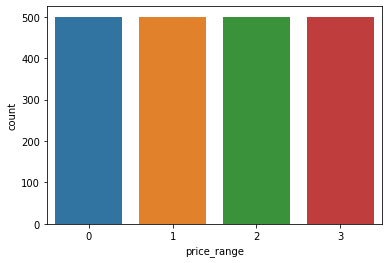

In [ ]:
sns.countplot(Mobile_Price['price_range'])

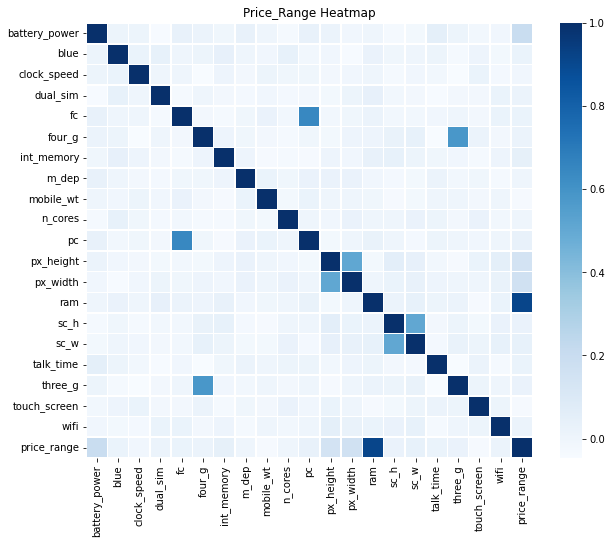

In [ ]:
#Heatmap
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Price_Range Heatmap")
corr = Mobile_Price.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

**Spliting data into training and test data**

In [ ]:
em = pd.get_dummies(Mobile_Price)

In [ ]:
em.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
Mobile_Price['price_range']=LabelEncoder().fit_transform(Mobile_Price['price_range'])
y=Mobile_Price['price_range']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(em,y, test_size=0.30, random_state=0)

 **Applying Models**

**Model 1) Logestic Regression**

In [ ]:
#Fitting the model

logistic_Regression = LogisticRegression(max_iter=3000,random_state=0,class_weight="balanced",solver = "saga")
logistic_Regression.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(class_weight='balanced', max_iter=3000, random_state=0,
                   solver='saga')

In [ ]:
# Applying the model to the x_test

y_pred = logistic_Regression.predict(x_test)
y_pred

array([3, 0, 2, 1, 3, 0, 0, 2, 3, 1, 1, 3, 1, 1, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 2, 0, 1, 1, 2, 3, 0, 0, 3, 2, 3, 2, 3, 3,
       2, 3, 0, 1, 3, 2, 1, 2, 0, 3, 0, 3, 3, 1, 0, 3, 3, 1, 2, 1, 1, 3,
       3, 3, 2, 2, 3, 3, 1, 0, 1, 3, 3, 1, 1, 1, 3, 1, 3, 0, 0, 0, 1, 0,
       1, 3, 1, 2, 1, 0, 0, 3, 2, 3, 0, 2, 1, 2, 2, 0, 3, 3, 3, 2, 2, 3,
       2, 0, 0, 2, 2, 3, 0, 1, 0, 0, 0, 3, 2, 2, 1, 2, 1, 0, 0, 3, 1, 3,
       3, 2, 3, 3, 3, 3, 0, 1, 1, 3, 2, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 2, 2, 1, 3, 3, 3, 3, 1, 0, 3, 2, 1, 3, 3, 0,
       1, 2, 3, 0, 3, 1, 0, 1, 3, 1, 2, 0, 3, 3, 2, 2, 0, 2, 2, 1, 0, 2,
       2, 0, 3, 3, 3, 0, 1, 3, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 3, 2, 2,
       2, 3, 0, 0, 3, 3, 2, 2, 0, 2, 0, 0, 0, 3, 2, 0, 2, 3, 0, 0, 0, 3,
       3, 2, 0, 0, 2, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 2, 3, 2, 0, 0, 1, 3,
       3, 3, 2, 3, 3, 2, 1, 2, 2, 2, 1, 3, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0,
       1, 3, 2, 2, 0, 1, 2, 0, 2, 2, 3, 0, 1, 0, 1,

**Model 2)  KNN Classification**

In [ ]:
#Fitting the model

knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=35)

In [ ]:
# Applying the model to the x_test

pred_knn = knn.predict(x_test)
pred_knn

array([3, 0, 2, 2, 2, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 3, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 2, 2, 3, 0, 3, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 2, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 3, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       2, 0, 3, 3, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 1, 1, 0, 3,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 2, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 3, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

Model 3) SVM Classifier 

In [ ]:
#Fitting the model
svc = SVC(probability=True)
svc.fit(x_train,y_train)

SVC(probability=True)

In [ ]:
# Applying the model to the x_test
pred_svc = svc.predict(x_test)
pred_svc

array([3, 0, 2, 2, 2, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 3, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 3, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 3,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 1, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 3, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

**Computing Confusion matrix**

Model 1) Logistic Regression

[[129  21   0   0]
 [ 20  77  35   1]
 [  2  35  70  40]
 [  0   2  46 122]]


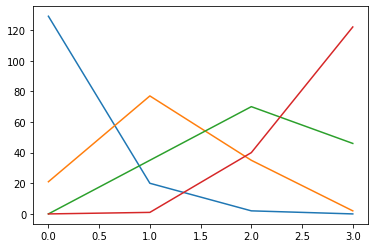

In [ ]:
# Confusion Matrix

cmlr=confusion_matrix(y_pred,y_test)
print(cmlr)
plt.plot(cmlr)
plt.show()

Model 2) KNN Classification

[[150   7   0   0]
 [  1 122   7   0]
 [  0   6 133  12]
 [  0   0  11 151]]


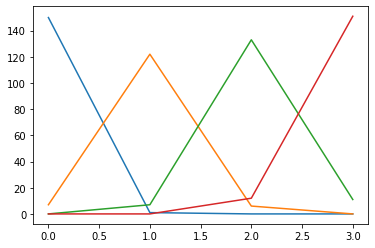

In [ ]:
# Confusion Matrix

cm_knn=confusion_matrix(pred_knn,y_test)
print(cm_knn)
plt.plot(cm_knn)
plt.show()

Model 3) SVM Classifier

[[149   6   0   0]
 [  2 128   7   0]
 [  0   1 133   4]
 [  0   0  11 159]]


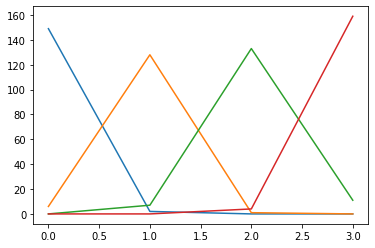

In [ ]:
# Confusion Matrix

cm_svc=confusion_matrix(pred_svc,y_test)
print(cm_svc)
plt.plot(cm_svc)
plt.show()

**Classification Report**

Model 1) Logistic Regression

In [ ]:
# Classification Report that computes various
# metrics like Precision, Recall and F1 Score

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       150
           1       0.57      0.58      0.57       133
           2       0.46      0.48      0.47       147
           3       0.75      0.72      0.73       170

    accuracy                           0.66       600
   macro avg       0.66      0.66      0.66       600
weighted avg       0.67      0.66      0.66       600



Model 2) KNN Classification

In [ ]:
# Classification Report that computes various
# metrics like Precision, Recall and F1 Score

print(classification_report(pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       157
           1       0.90      0.94      0.92       130
           2       0.88      0.88      0.88       151
           3       0.93      0.93      0.93       162

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



Model 3) SVM Classifier

In [ ]:
# Classification Report that computes various 
#metrics like Precision, Recall and F1 Score

print(classification_report(pred_svc,y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       155
           1       0.95      0.93      0.94       137
           2       0.88      0.96      0.92       138
           3       0.98      0.94      0.95       170

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



**Finding Best Model with best Accuracy**

Model 1) Logistic Regression

In [ ]:
# Finding Accuracy

log = accuracy_score(y_pred,y_test)*100

Model 2) KNN Classification

In [ ]:
# Finding Accuracy

KNN = accuracy_score(pred_knn,y_test)*100

Model 3) SVM Classifier 

In [ ]:
# Finding Accuracy

SVC = accuracy_score(pred_svc,y_test)*100

In [ ]:
# Accuracy values for all the models
print("1)  Logistic Regression    :",round(log, 2))
print("2)  KNN                    :",round(KNN, 2))
print("4)  SVM                    :",round(SVC, 2))

1)  Logistic Regression    : 66.33
2)  KNN                    : 92.67
4)  SVM                    : 94.83


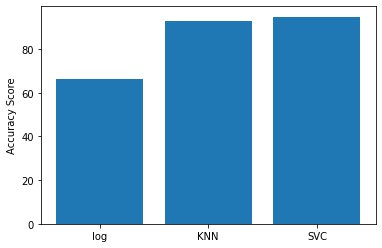

In [ ]:
plt.bar(x=['log','KNN','SVC',], height=[log,KNN,SVC])
plt.ylabel("Accuracy Score")
plt.show()

Observation: Here SVM has the best accuracy and hence the best model.